In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data_dir = 'data'
dates = ['2021-04-19', '2021-05-08', '2021-05-27']

manipulated = []
disturbed = []
disturbing = []
loss = []

for date in dates:
    files = os.listdir(os.path.join(data_dir, date))
    for file in files:
        file_path = os.path.join(data_dir, date, file)
        if file.startswith('zaklocajace'):
            disturbing.append(file_path)
        elif file.startswith('zaklocane'):
            disturbed.append(file_path)
        elif file.startswith('manipulowane'):
            manipulated.append(file_path)
        elif file.startswith('straty'):
            loss.append(file_path)
        else:
            raise ValueError

In [13]:
manipulated_dfs = [pd.read_csv(file_path) for file_path in manipulated]
manipulated_df = pd.concat(manipulated_dfs, ignore_index=True)
manipulated_df = manipulated_df.iloc[:, :-1]
manipulated_df = manipulated_df.rename(columns={
    '001FCx00285_SPPV.PV': 'Przepływ powietrza dystrybucyjnego - SV[Nm3/h]',
    '001XXXCALC01.NUM.PV[3]': 'Stężenie O2 w dmuchu - SV [%]',
    '001SCx00274_SPPV.PV': 'Prędkość dmuchu  - SV [m/s]',
    '001FCx00241_sppv.pv': 'Nadawa pyłów procesowych  - SV [Mg/h]'
})
manipulated_df['Czas'] = pd.to_datetime(manipulated_df['Czas'])
manipulated_df = manipulated_df.sort_values(by='Czas', ascending=True)
manipulated_df = manipulated_df.reset_index(drop=True)

In [14]:
disturbed_dfs = [pd.read_csv(file_path) for file_path in disturbed]
disturbed_df = pd.concat(disturbed_dfs, ignore_index=True)
disturbed_df = disturbed_df.iloc[:, :-1]
disturbed_df = disturbed_df.rename(columns={
    '001UCx00274.pv': 'Kąt dystrybucji mieszanki wsadowej - FV [°]',
    '001NIR0ODS0.daca.pv': 'Straty łącznie odstojnik - FV [MW]',
    'temp_zuz': 'Temperatura żużla - FV [°C]',
    '007SxR00555.daca1.pv': 'Drgania KO -FV [mm]'
})
disturbed_df['Czas'] = pd.to_datetime(disturbed_df['Czas'])
disturbed_df = disturbed_df.sort_values(by='Czas', ascending=True)
disturbed_df = disturbed_df.reset_index(drop=True)

In [15]:
disturbing_dfs = [pd.read_csv(file_path) for file_path in disturbing]
disturbing_df = pd.concat(disturbing_dfs, ignore_index=True)
disturbing_df = disturbing_df.iloc[:, :-1]
disturbing_df = disturbing_df.rename(columns={
    '001FYx00206_SPSUM.pv': 'Nadawa miesz. konc. SET [Mg/h]',
    '001FCx00231_SPPV.PV': 'Nadawa prażonki SET [Mg/h]',
    '001FCx00251_SPPV.PV': 'Nadawa żużel Pb SET [Mg/h]',
    '001FCx00281.PV': 'Tlen do lancy PK przepływ [Nm3/h]',
    '001FCx00262.PV': 'Tlen do dmuchu - przepływ [Nm3/h]',
    '001FCx00261.PV': 'Powietrze do dmuchu - przepływ [Nm3/h]',
    '001XXXCALC01.NUM.PV[2]': 'Przetlenienie SET [Nm3O2/Mg konc.]',
    'prob_corg': 'Miesz. konc. analiza węgla organicznego - FV [%]',
    'prob_s': 'Miesz. konc. analiza siarki - FV [%]',
    'sita_nadziarno': 'Miesz. Konc. Nadziarno >=5mm - FV [%]',
    'sita_podziarno': 'Miesz. Konc. podziarno <0,07 mm - FV  [%]'
})
disturbing_df['Czas'] = pd.to_datetime(disturbing_df['Czas'])
disturbing_df = disturbing_df.sort_values(by='Czas', ascending=True)
disturbing_df = disturbing_df.reset_index(drop=True)

In [16]:
loss_dfs = [pd.read_csv(file_path) for file_path in loss]
loss_df = pd.concat(loss_dfs, ignore_index=True)
loss_df = loss_df.rename(columns={
    'czas': 'Czas',
    '001NIR0SZR0.daca.pv': 'Straty łącznie KSR-FV [MW]',
    '001NIR0SZRG.daca.pv': 'KSR Pas G straty-FV   [MW]',
    '001NIR0S600.daca.pv': 'KSR Pierścień S600 straty-FV   [MW]',
    '001NIR0S500.daca.pv': 'KSR Pierścień S500/S400 straty -FV [MW]',
    '001NIR0S300.daca.pv': 'KSR Pierścień S300/S200 -FV  [MW]',
    '001NIR0S100.daca.pv': 'KSR Pierścień S100 -FV  [MW]'
})
loss_df['Czas'] = pd.to_datetime(loss_df['Czas'])
loss_df = loss_df.sort_values(by='Czas', ascending=True)
loss_df = loss_df.reset_index(drop=True)

In [17]:
dfs = [manipulated_df, disturbing_df, disturbed_df, loss_df]
df = pd.concat(dfs, axis=1)
df = df.loc[:, ~df.columns.duplicated()]

In [18]:
df

,Czas,Przepływ powietrza dystrybucyjnego - SV[Nm3/h],Stężenie O2 w dmuchu - SV [%],Prędkość dmuchu - SV [m/s],Nadawa pyłów procesowych - SV [Mg/h],Nadawa miesz. konc. SET [Mg/h],Nadawa prażonki SET [Mg/h],Nadawa żużel Pb SET [Mg/h],Tlen do lancy PK przepływ [Nm3/h],Tlen do dmuchu - przepływ [Nm3/h],...,Kąt dystrybucji mieszanki wsadowej - FV [°],Straty łącznie odstojnik - FV [MW],Temperatura żużla - FV [°C],Drgania KO -FV [mm],Straty łącznie KSR-FV [MW],KSR Pas G straty-FV [MW],KSR Pierścień S600 straty-FV [MW],KSR Pierścień S500/S400 straty -FV [MW],KSR Pierścień S300/S200 -FV [MW],KSR Pierścień S100 -FV [MW]
0,2021-04-19 00:00:00,2700.0,81.0,50.0,31.0,114.0,10.0,3.0,350.000000,31570.68359,...,13.727884,9.327152,1306,-0.128922,23.298206,0.870960,1.513844,7.206612,7.292219,6.445967
1,2021-04-19 00:00:01,2700.0,81.0,50.0,31.0,114.0,10.0,3.0,350.010620,31577.13672,...,13.726639,9.329683,1305,-0.328362,23.303154,0.870934,1.513818,7.207745,7.292501,6.446149
2,2021-04-19 00:00:02,2700.0,81.0,50.0,31.0,114.0,10.0,3.0,349.990967,31583.59375,...,13.725391,9.332214,1305,-0.113587,23.308102,0.870908,1.513792,7.208877,7.293985,6.446331
3,2021-04-19 00:00:03,2700.0,81.0,50.0,31.0,114.0,10.0,3.0,349.971375,31590.04688,...,13.724146,9.334154,1305,0.101188,23.313053,0.870881,1.513766,7.210010,7.295469,6.446513
4,2021-04-19 00:00:04,2700.0,81.0,50.0,31.0,114.0,10.0,3.0,349.951721,31596.50000,...,13.722900,9.335503,1305,-0.098252,23.318001,0.870855,1.513740,7.211143,7.296953,6.446695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340795,2021-06-06 22:49:55,3000.0,72.0,50.0,24.0,114.0,9.0,2.0,251.662262,27488.40234,...,17.086479,10.113976,1301,0.622794,17.705795,0.858735,1.462337,4.117548,5.318237,5.966559
3340796,2021-06-06 22:49:56,3000.0,72.0,50.0,24.0,114.0,9.0,2.0,251.629669,27487.50391,...,17.096081,10.115042,1301,0.684169,17.707394,0.858851,1.462500,4.117713,5.318606,5.966569
3340797,2021-06-06 22:49:57,3000.0,72.0,50.0,24.0,114.0,9.0,2.0,252.000000,27486.60742,...,17.105686,10.116107,1301,0.711000,17.708994,0.858968,1.462663,4.117879,5.318974,5.966580
3340798,2021-06-06 22:49:58,3000.0,72.0,50.0,24.0,114.0,9.0,2.0,252.000000,27485.70898,...,17.115292,10.117172,1301,0.581000,17.710592,0.859084,1.462826,4.118045,5.319343,5.966590


In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [20]:
df.columns

Index(['Czas', 'Przepływ powietrza dystrybucyjnego - SV[Nm3/h]',
       'Stężenie O2 w dmuchu - SV [%]', 'Prędkość dmuchu  - SV [m/s]',
       'Nadawa pyłów procesowych  - SV [Mg/h]',
       'Nadawa miesz. konc. SET [Mg/h]', 'Nadawa prażonki SET [Mg/h]',
       'Nadawa żużel Pb SET [Mg/h]', 'Tlen do lancy PK przepływ [Nm3/h]',
       'Tlen do dmuchu - przepływ [Nm3/h]',
       'Powietrze do dmuchu - przepływ [Nm3/h]',
       'Przetlenienie SET [Nm3O2/Mg konc.]',
       'Miesz. konc. analiza węgla organicznego - FV [%]',
       'Miesz. konc. analiza siarki - FV [%]',
       'Miesz. Konc. Nadziarno >=5mm - FV [%]',
       'Miesz. Konc. podziarno <0,07 mm - FV  [%]',
       'Kąt dystrybucji mieszanki wsadowej - FV [°]',
       'Straty łącznie odstojnik - FV [MW]', 'Temperatura żużla - FV [°C]',
       'Drgania KO -FV [mm]', 'Straty łącznie KSR-FV [MW]',
       'KSR Pas G straty-FV   [MW]', 'KSR Pierścień S600 straty-FV   [MW]',
       'KSR Pierścień S500/S400 straty -FV [MW]',
       'KSR

In [21]:
df_to_model = df[df['Czas'] < '2021-05-26']
df_to_pred = df[df['Czas'] > '2021-05-26']

In [22]:
y_names = [
    'KSR Pierścień S100 -FV  [MW]',
    'KSR Pierścień S300/S200 -FV  [MW]',
    'KSR Pierścień S500/S400 straty -FV [MW]',
    'KSR Pierścień S600 straty-FV   [MW]',
    'KSR Pas G straty-FV   [MW]',
    'Temperatura żużla - FV [°C]',
    'Drgania KO -FV [mm]'
]

best_models = []
X = df_to_model.iloc[:, 1:5]
for y_name in y_names:
    y = df_to_model[y_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

    pipe_lr = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures()),
        ('lr', LinearRegression())
    ])

    pipe_ridge = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures()),
        ('ridge', Ridge())
    ])

    pipe_lasso = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures()),
        ('lasso', Lasso())
    ])

    names = ['LR', 'Ridge', 'Lasso']
    models = [pipe_lr, pipe_ridge, pipe_lasso]
    param_grids = [
        {
            'poly__degree': [1, 2]
        },
        {
            'poly__degree': [1, 2],
            'ridge__alpha': [0.01, 0.1, 1, 10]
        },
        {
            'poly__degree': [1, 2],
            'lasso__alpha': [0.01, 0.1, 1, 10]
        }
    ]

    best_model = None
    best_model_name = None
    best_mse = np.Inf

    for name, model, param_grid in zip(names, models, param_grids):
        optimizer = GridSearchCV(model, param_grid, cv=5)
        optimizer.fit(X_train, y_train)
    
        y_pred = optimizer.best_estimator_.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_model = optimizer.best_estimator_
            best_model_name = name

    best_models.append(best_model)
    print(f'For {y_name} variable best model: {best_model_name}, MSE={best_mse.round(3)}.')

For KSR Pierścień S100 -FV  [MW] variable best model: Ridge, MSE=0.084.
For KSR Pierścień S300/S200 -FV  [MW] variable best model: LR, MSE=0.381.
For KSR Pierścień S500/S400 straty -FV [MW] variable best model: Ridge, MSE=1.0.
For KSR Pierścień S600 straty-FV   [MW] variable best model: LR, MSE=0.027.
For KSR Pas G straty-FV   [MW] variable best model: LR, MSE=0.006.
For Temperatura żużla - FV [°C] variable best model: Ridge, MSE=30.188.
For Drgania KO -FV [mm] variable best model: Ridge, MSE=0.698.


In [23]:
X_to_pred = df_to_pred.iloc[:, 1:5]

preds = [model.predict(X_to_pred) for model in best_models[:5]]

Q_pred = sum(preds)
T_pred = best_models[5].predict(X_to_pred)
x_pred = best_models[6].predict(X_to_pred)

Q = df_to_pred['Straty łącznie KSR-FV [MW]'].to_list()
T = df_to_pred['Temperatura żużla - FV [°C]'].to_list()
x = df_to_pred['Drgania KO -FV [mm]'].to_list()

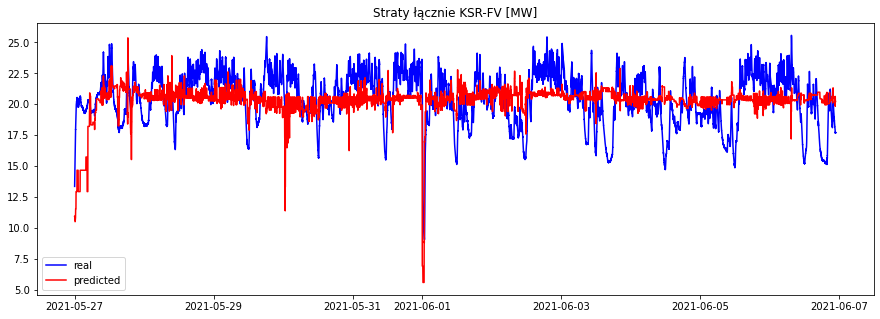

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(df_to_pred['Czas'], Q, color='b', label='real')
plt.plot(df_to_pred['Czas'], Q_pred, color='r', label='predicted')
plt.title('Straty łącznie KSR-FV [MW]')
plt.legend()
plt.show()

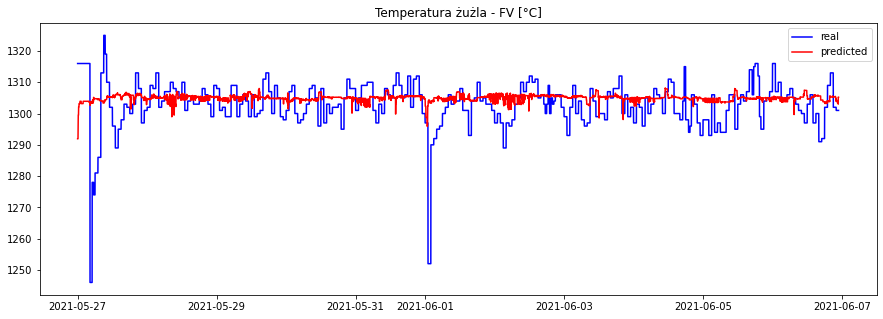

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(df_to_pred['Czas'], T, color='b', label='real')
plt.plot(df_to_pred['Czas'], T_pred, color='r', label='predicted')
plt.title('Temperatura żużla - FV [°C]')
plt.legend()
plt.show()

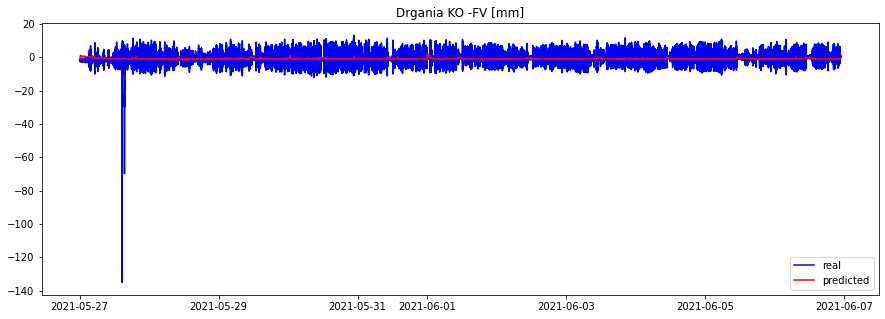

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(df_to_pred['Czas'], x, color='b', label='real')
plt.plot(df_to_pred['Czas'], x_pred, color='r', label='predicted')
plt.title('Drgania KO -FV [mm]')
plt.legend()
plt.show()

In [27]:
def penalty(x0, temp, dQ, vib):
    div_coef = x0[0]
    optimal_temp_coef = x0[1]
    temp_coef = x0[2]
    heat_coef = x0[3]
    vib_coef = x0[4]

    func = temp_coef * np.exp((temp - optimal_temp_coef)**2 / div_coef) \
           + heat_coef * np.abs(dQ) \
           + vib_coef * vib**2

    return func

In [28]:
def penalty_sum(x0, temp, dQ, vib):
    div_coef = x0[0]
    optimal_temp_coef = x0[1]
    temp_coef = x0[2]
    heat_coef = x0[3]
    vib_coef = x0[4]

    func = temp_coef * np.exp((temp - optimal_temp_coef)**2 / div_coef) \
           + heat_coef * np.abs(dQ) \
           + vib_coef * vib**2

    return func.sum()

In [29]:
new_df = pd.DataFrame(data={
    'Czas': df_to_pred['Czas'].to_list(),
    'Q': df_to_pred['Straty łącznie KSR-FV [MW]'].to_list(),
    'Q_pred': Q_pred,
    'T': df_to_pred['Temperatura żużla - FV [°C]'].to_list(),
    'T_pred': T_pred,
    'x': df_to_pred['Drgania KO -FV [mm]'],
    'x_pred': x_pred
})
new_df = new_df.reset_index()
new_df = new_df.drop(['index'], axis=1)

time_diff = 30
rolling_sum = 10

new_df['dQ_pred'] = new_df['Q_pred'].diff(periods=time_diff)
new_df['x_sum_pred'] = new_df['x_pred'].rolling(rolling_sum).sum()

new_df = new_df[~new_df['dQ_pred'].isna()]

In [30]:
new_df

,Czas,Q,Q_pred,T,T_pred,x,x_pred,dQ_pred,x_sum_pred
30,2021-05-27 00:00:30,13.505133,10.948411,1316,1291.936387,-1.755116,-1.068028,0.0,-10.680277
31,2021-05-27 00:00:31,13.511087,10.948411,1316,1291.936387,-1.872735,-1.068028,0.0,-10.680277
32,2021-05-27 00:00:32,13.517042,10.948411,1316,1291.936387,-1.770463,-1.068028,0.0,-10.680277
33,2021-05-27 00:00:33,13.522995,10.948411,1316,1291.936387,-1.668191,-1.068028,0.0,-10.680277
34,2021-05-27 00:00:34,13.528950,10.948411,1316,1291.936387,-1.386925,-1.068028,0.0,-10.680277
...,...,...,...,...,...,...,...,...,...
946195,2021-06-06 22:49:55,17.705795,20.222918,1301,1305.203729,0.622794,-0.968243,0.0,-9.682426
946196,2021-06-06 22:49:56,17.707394,20.222918,1301,1305.203729,0.684169,-0.968243,0.0,-9.682426
946197,2021-06-06 22:49:57,17.708994,20.222918,1301,1305.203729,0.711000,-0.968243,0.0,-9.682426
946198,2021-06-06 22:49:58,17.710592,20.222918,1301,1305.203729,0.581000,-0.968243,0.0,-9.682426


In [32]:
# Obliczenia dla oceny stabilności pieca
x0 = (100, 1295, 1, 5, 0.001)
penalty_results = penalty(x0, new_df['T_pred'], new_df['dQ_pred'], new_df['x_sum_pred'])
penalty_results.sort_values(ascending=False)

432323    56.574489
432322    56.574489
432324    56.574489
432325    56.574489
432326    56.574489
            ...    
434822     1.012670
434821     1.012670
434820     1.012670
434819     1.012670
434840     1.012670
Length: 946170, dtype: float64

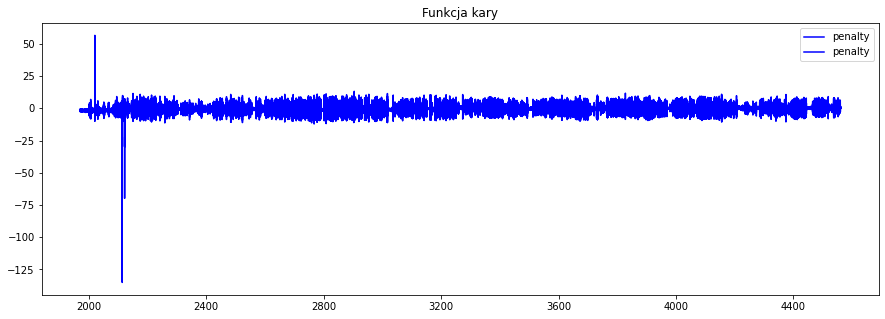

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(new_df['Czas'], penalty_results, x, color='b', label='penalty')
plt.title('Funkcja kary')
plt.legend()
plt.show()

In [209]:
import scipy

coefs = (100, 1295, 1, 5, 0.001)
result = scipy.optimize.minimize(
    fun=penalty_sum,
    x0=coefs,
    args=(new_df['T_pred'], new_df['dQ_pred'], new_df['x_sum_pred']),
    method='BFGS',
)

/home/mickuz/piec/venv/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mickuz/piec/venv/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/mickuz/piec/venv/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mickuz/piec/venv/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [210]:
result

      fun: -73732182161.9506
 hess_inv: array([[ 9.99652721e-01, -1.67088809e-02,  3.14869744e-02,
         7.89325005e-04,  1.72745042e+00],
       [-1.67088809e-02,  2.29185967e-01,  2.50181685e+00,
         6.60923298e-02,  1.41564497e+02],
       [ 3.14869744e-02,  2.50181685e+00,  2.75573602e+01,
         7.66366294e-01,  1.58542047e+03],
       [ 7.89325005e-04,  6.60923298e-02,  7.66366294e-01,
         1.02207805e+00,  4.57032853e+01],
       [ 1.72745042e+00,  1.41564497e+02,  1.58542047e+03,
         4.57032853e+01,  9.45871072e+04]])
      jac: array([2.150400e+04, 1.135616e+06, 1.059840e+06, 3.686400e+04,
       7.128576e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 780
      nit: 1
     njev: 128
   status: 2
  success: False
        x: array([  100.04655733,  1301.78543258,   -16.77040797,     4.50817472,
       -1034.08466298])